# License_plate With PaddleOCR

# License Plate Optical Character Recognition (OCR)

## Introduction

License Plate Recognition (LPR) through OCR is a specialized application of computer vision and text recognition technology that focuses on automatically reading and extracting text from vehicle license plates. This technology has become increasingly crucial in modern traffic management and security systems.



## Importance of License Plate OCR

License plate OCR serves several critical purposes across different sectors:

1. **Traffic Management**
   - Automated toll collection
   - Parking management systems
   - Traffic flow monitoring
   - Speed enforcement

2. **Security Applications**
   - Access control in restricted areas
   - Vehicle theft detection
   - Border control and customs
   - Law enforcement investigations

3. **Business Operations**
   - Fleet management
   - Logistics tracking
   - Automated parking payment systems
   - Customer vehicle identification at service centers



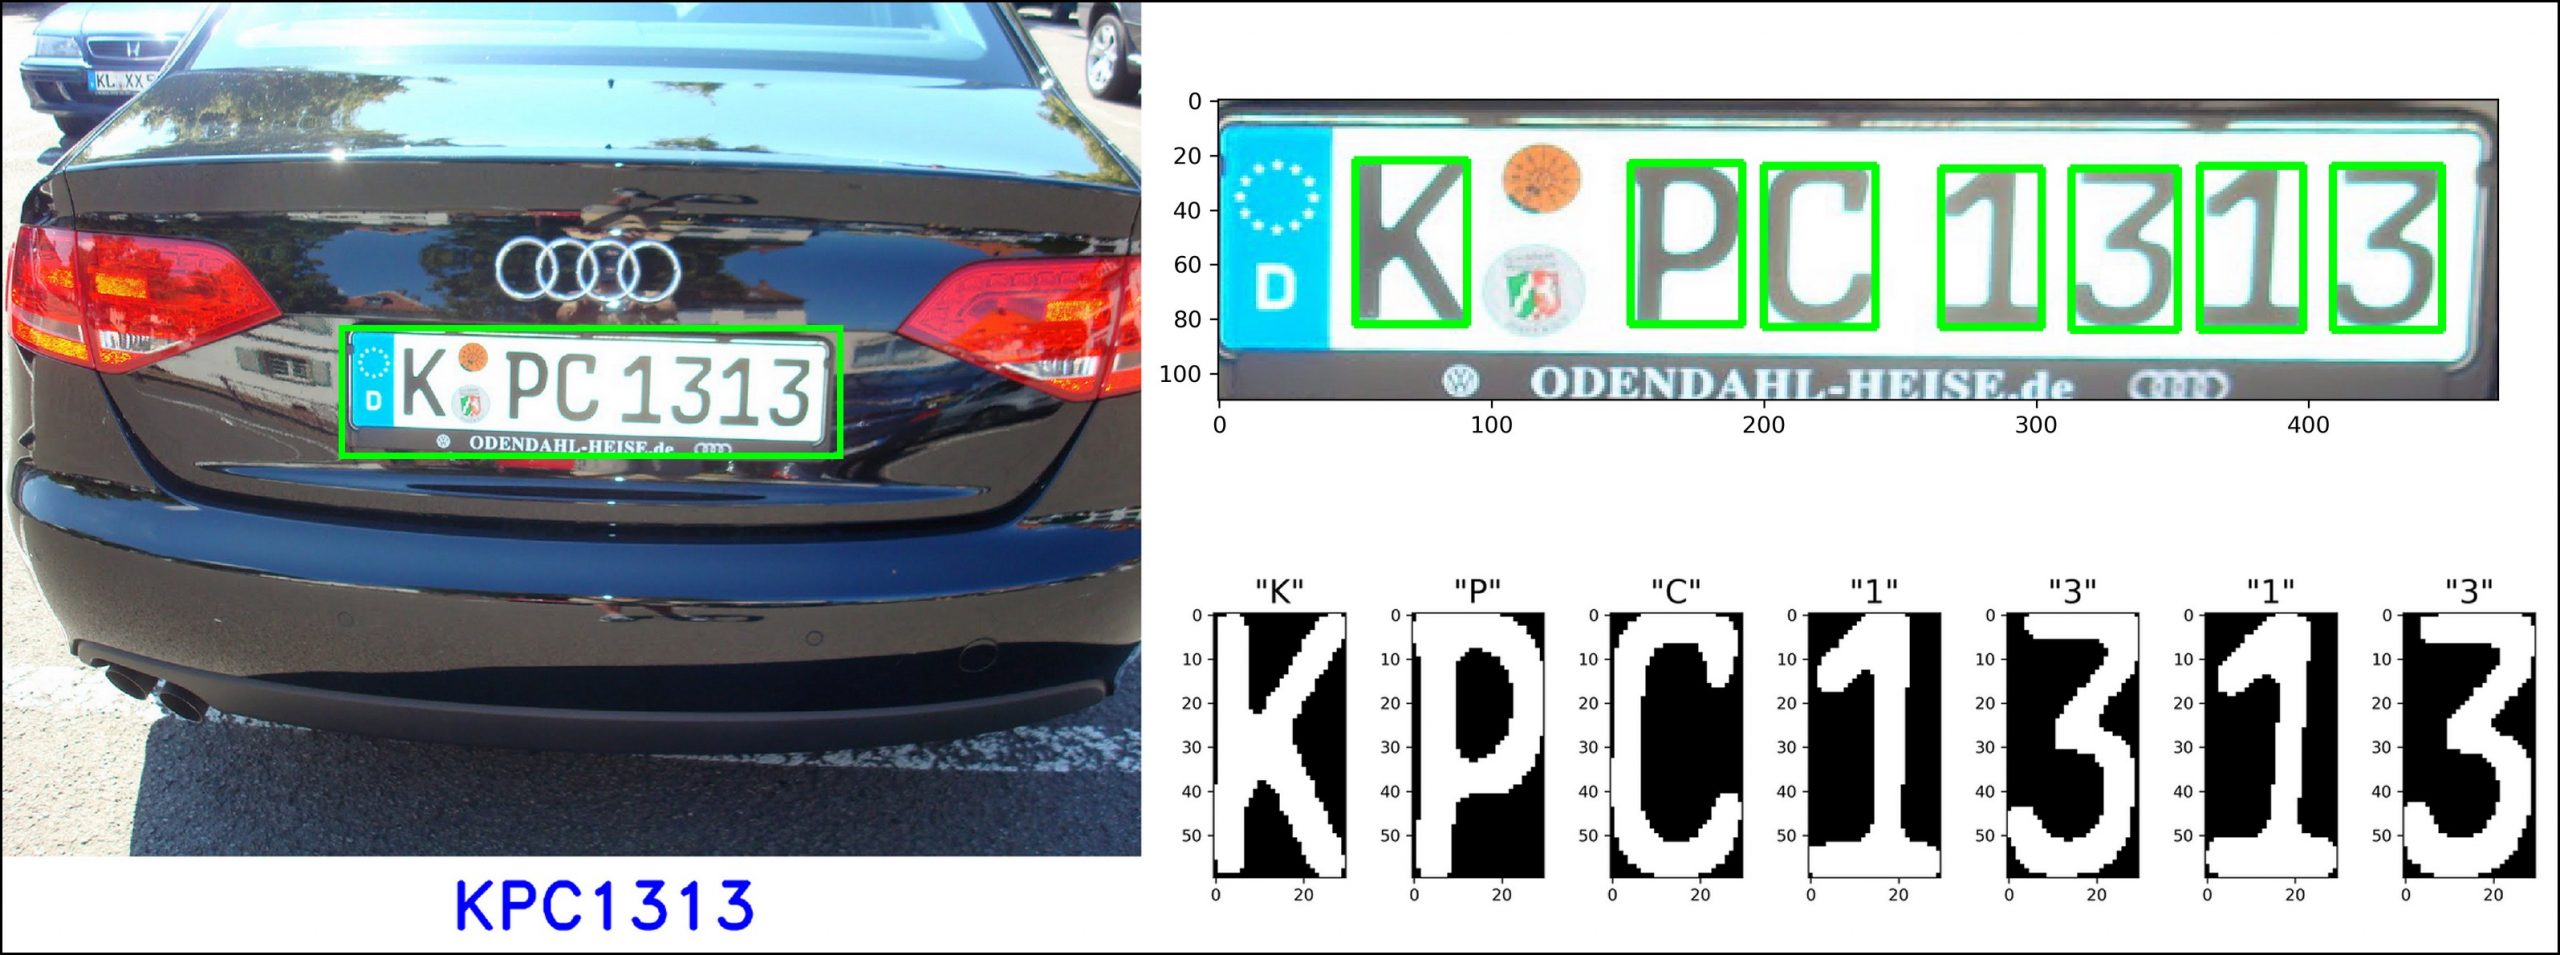

## Structure of European License Plates

European license plates follow specific patterns and standards that vary by country, but share some common characteristics:

### Common Features
- **Size**: Standard EU plates are 520×110mm (cars)
- **Font**: Most countries use specific variants of FE-Schrift or similar fonts
- **EU Band**: Blue strip on the left with country code
- **Materials**: Reflective background with dark characters

### Country-Specific Patterns
1. **Germany**
   - Format: City Code + 1-2 Letters + 1-4 Numbers
   - Example: B-AB 1234 (Berlin)

2. **France**
   - Format: AB-123-CD
   - Region indicated by numbers

3. **Italy**
   - Format: AA 123 BB
   - Two letters + three numbers + two letters

### Challenges in EU License Plate Recognition
1. **Diverse Formats**: Each country has unique formats
2. **Special Characters**: Many countries use hyphens, spaces
3. **Font Variations**: Different fonts across countries
4. **Regional Identifiers**: Additional symbols or codes



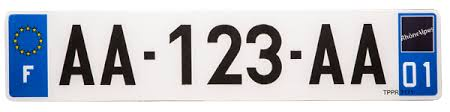

## Understanding OCR Tasks

OCR (Optical Character Recognition) is the technology that converts different types of documents into machine-encoded text. For license plates, the OCR task involves several key steps:

1. **Preprocessing**
   - Image normalization
   - Noise reduction
   - Perspective correction
   - Character segmentation

2. **Text Recognition**
   - Character detection
   - Feature extraction
   - Character classification
   - Post-processing

3. **Validation**
   - Format checking
   - Country-specific rule validation
   - Confidence scoring

## OCR Frameworks Comparison

### Popular OCR Frameworks

1. **Tesseract OCR**
   - Open-source
   - Maintained by Google
   - Good general-purpose OCR
   - Limited performance on specialized tasks

2. **EasyOCR**
   - Simple to use
   - Supports multiple languages
   - Good accuracy for general text
   - Slower compared to specialized solutions

3. **PaddleOCR**
   - High performance
   - Lightweight models
   - Specialized text detection
   - Extensive training options

### Why PaddleOCR for License Plates?

PaddleOCR is chosen for this project for several compelling reasons:

1. **Technical Advantages**
   - State-of-the-art accuracy
   - Fast inference speed
   - Lightweight model options
   - Better handling of varied text orientations

2. **Development Benefits**
   - Comprehensive training pipeline
   - Rich documentation
   - Active community support
   - Regular updates and improvements

3. **License Plate Specific Features**
   - Strong performance on structured text
   - Good handling of various fonts
   - Effective with different character spacings
   - Robust to different lighting conditions

4. **Implementation Flexibility**
   - Easy model customization
   - Support for different architectures
   - Batch processing capabilities
   - Export options for deployment



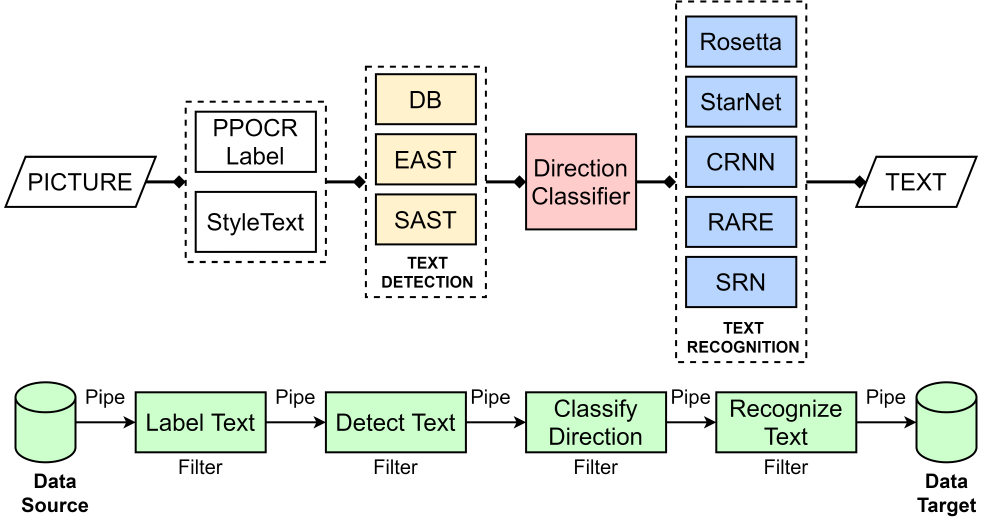

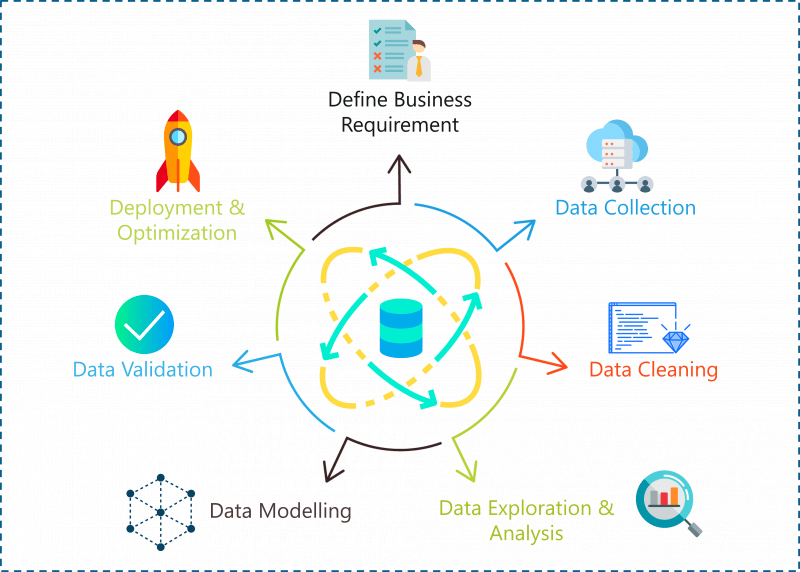

## Pipeline of License Plate OCR Project

In our license plate OCR project, this pipeline is specifically adapted:

1. **Business Requirements**
   - Accurate recognition of EU license plates
   - Real-time processing capabilities
   - Support for multiple plate formats

2. **Data Collection**
   - European License Plates Dataset
   - 735 total images across train/val/test splits
   - Structured labeling system

3. **Data Cleaning**
   - Image preprocessing
   - Standardizing plate orientations
   - Ensuring label quality

4. **Data Exploration**
   - Analysis of plate formats
   - Character distribution study
   - Image quality assessment
   - Lighting condition analysis

5. **Data Modelling**
   - Custom model configuration
   - Training pipeline setup
   - Model optimization

6. **Data Validation**
   - Accuracy metrics
   - Character-level validation

7. **Deployment**
   - Model packaging
   - API development
   - Performance optimization
   - Monitoring setup



# **Data Cleaning** and **Data Exploration**


## Dataset Overview

The European License Plates Dataset includes:
- Total Images: 735
- Training Set: 588 images
- Validation Set: 74 images
- Test Set: 73 images



## Cleaning data
Remove some data not clearly or out of scope of this project

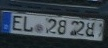

### Dataset Characteristics
- Cropped license plate images
- Clear filename labels
- Various European formats
- Real-world conditions
- Different lighting and angles

## Training Approach

Our training strategy with PaddleOCR includes:
1. Data preparation and augmentation
2. Model configuration optimization
3. Training with validation monitoring
4. Performance evaluation on test set


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Exploration

Train set analysis:
  - Total images: 571
  - Average height: 103.22 pixels
  - Average width: 341.59 pixels
  - Average aspect ratio: 3.28
  - Aspect ratio range: 0.87 - 5.50
  - Height range: 25 - 804
  - Width range: 63 - 2967

Test set analysis:
  - Total images: 71
  - Average height: 101.23 pixels
  - Average width: 337.08 pixels
  - Average aspect ratio: 3.30
  - Aspect ratio range: 1.54 - 5.50
  - Height range: 27 - 405
  - Width range: 72 - 1500

Validation set analysis:
  - Total images: 72
  - Average height: 91.24 pixels
  - Average width: 301.83 pixels
  - Average aspect ratio: 3.24
  - Aspect ratio range: 1.31 - 5.03
  - Height range: 32 - 177
  - Width range: 71 - 567



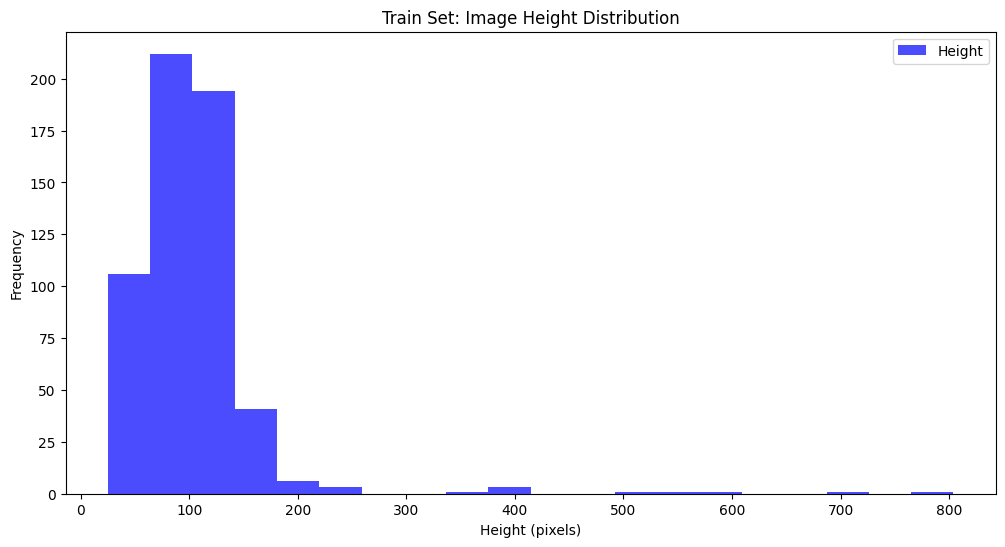

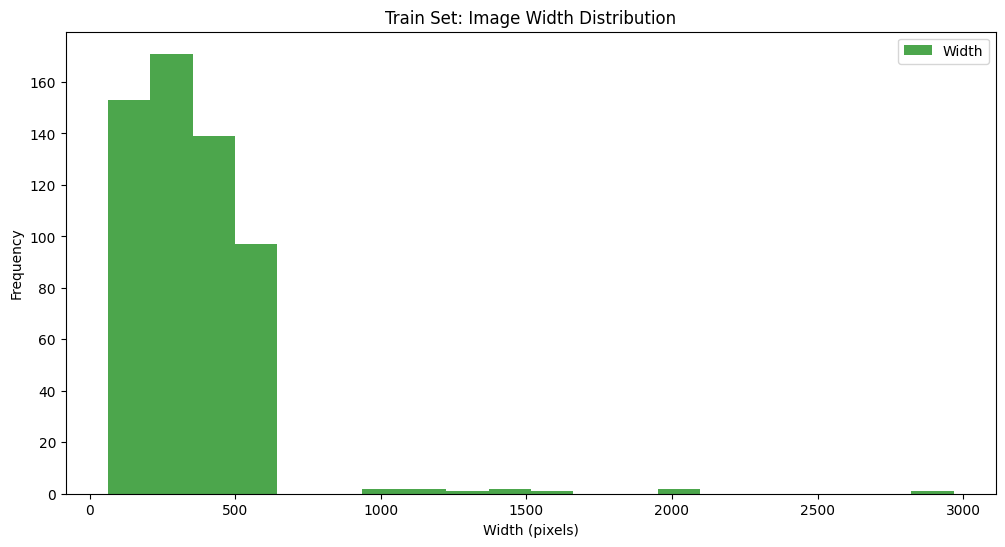

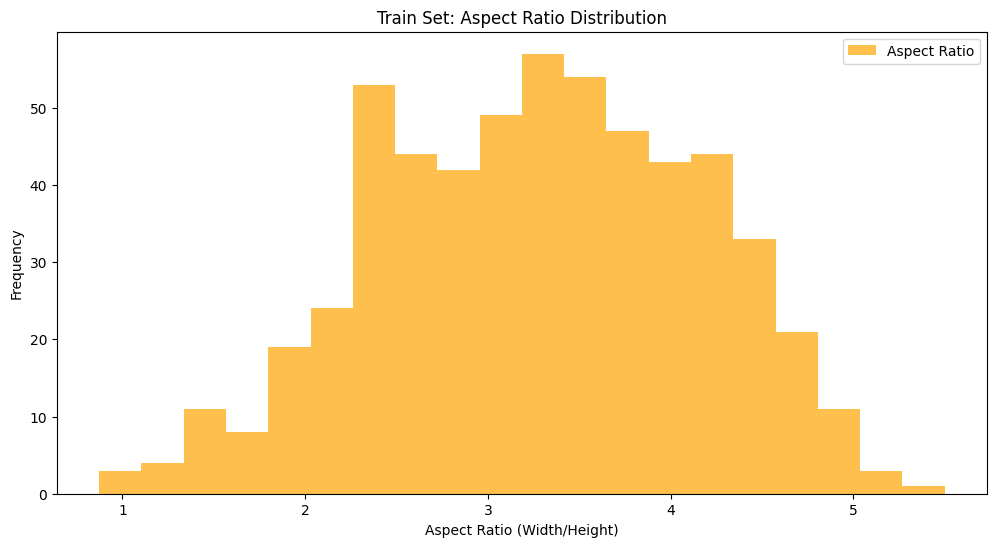

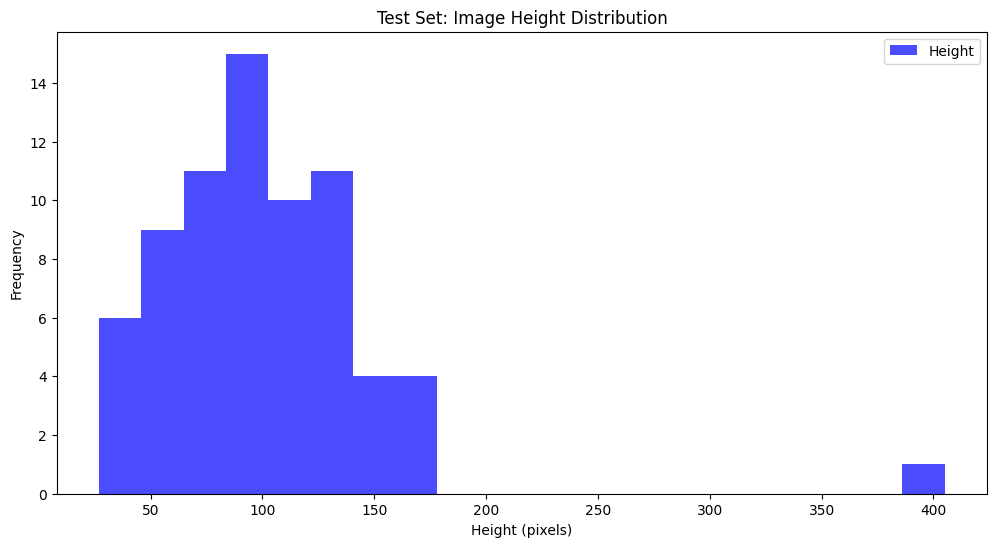

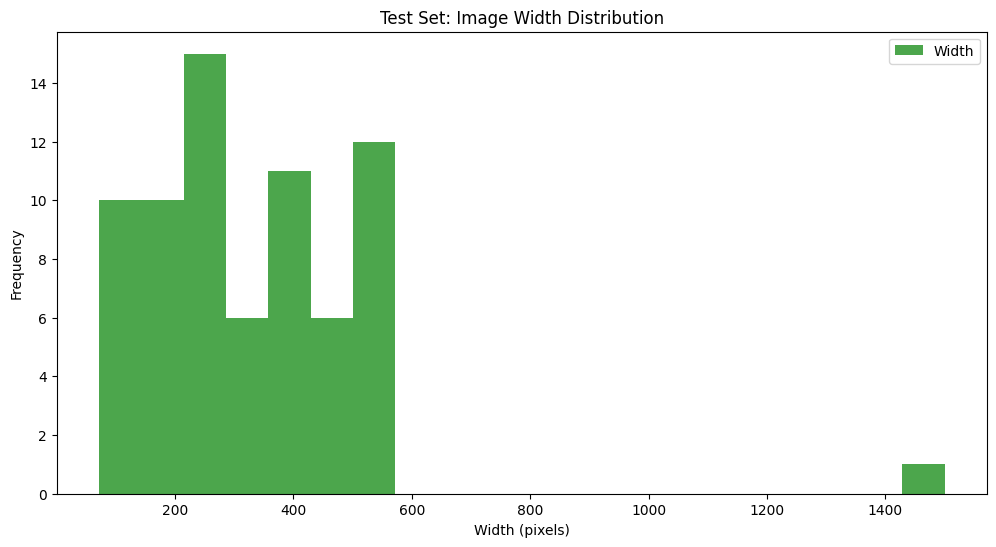

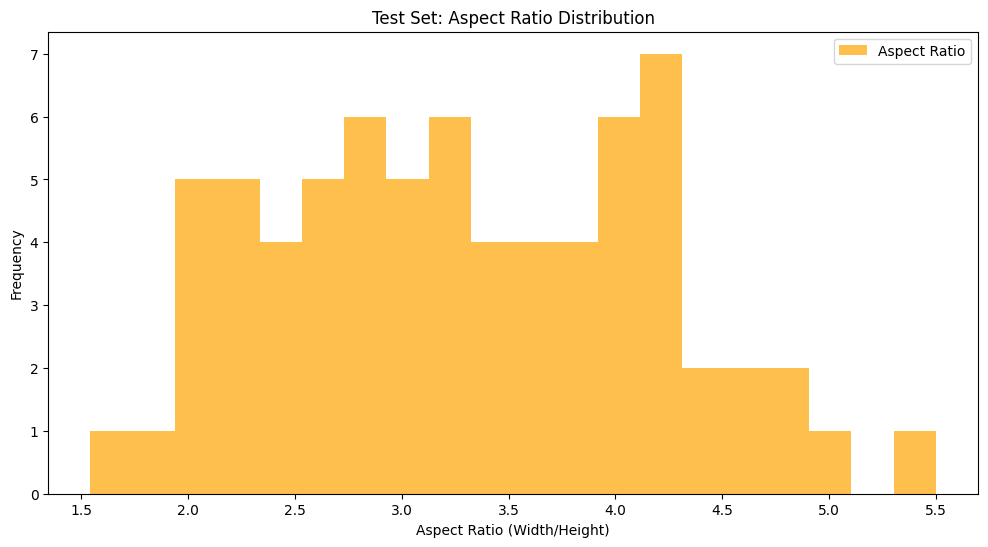

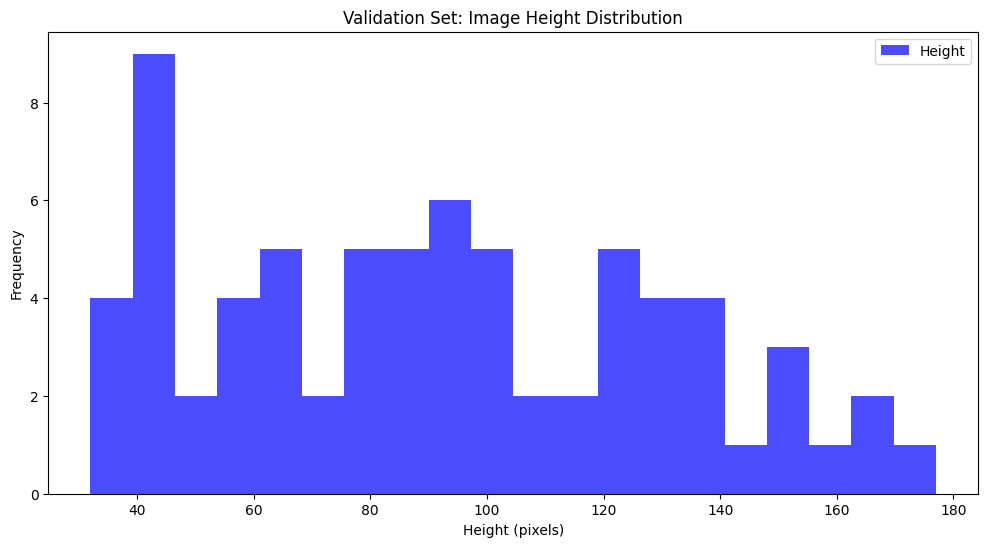

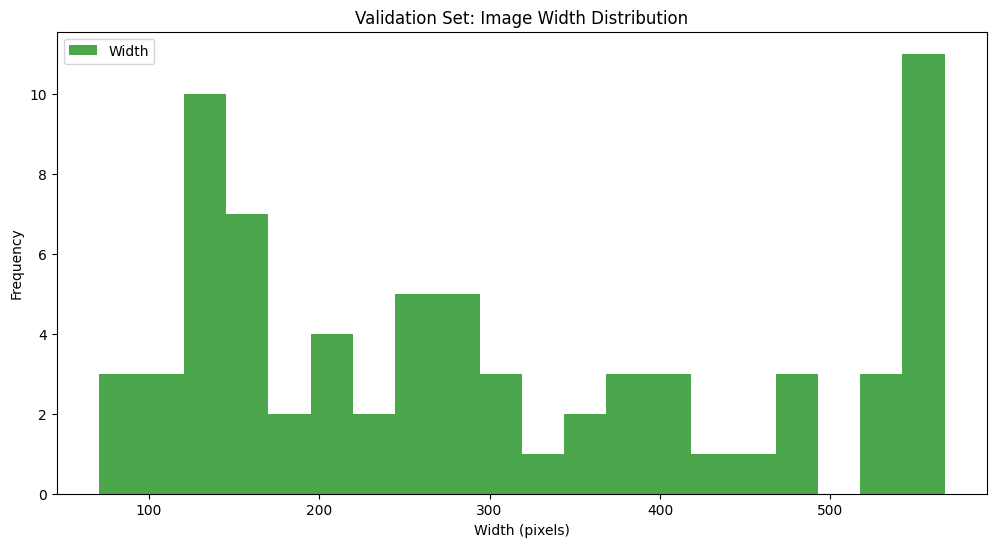

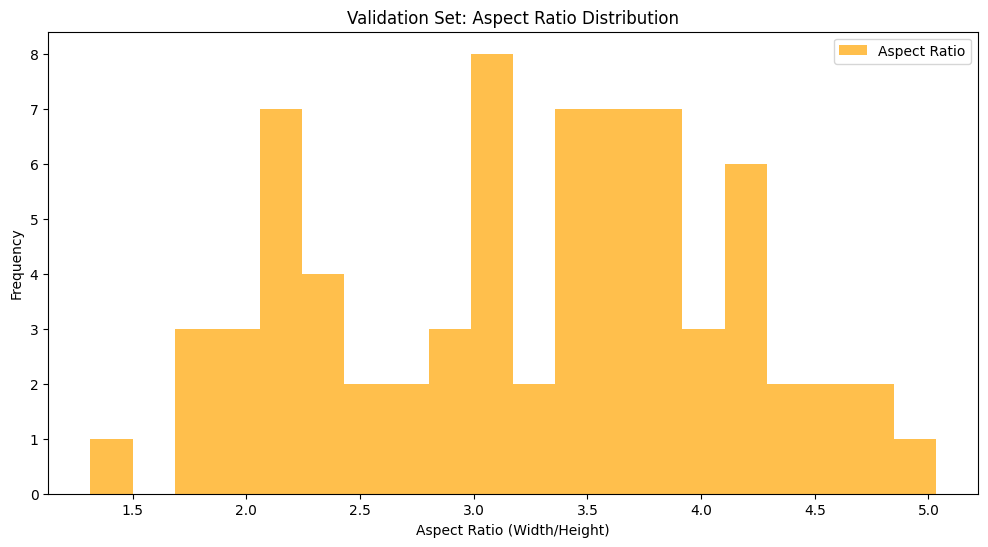

In [36]:

train_dir = '/content/drive/MyDrive/Deeplearning/Final_project/dataset/train/'
test_dir = '/content/drive/MyDrive/Deeplearning/Final_project/dataset/test/'
val_dir = '/content/drive/MyDrive/Deeplearning/Final_project/dataset/val/'


def get_image_stats(image_dir):
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    total_images = len(image_files)

    heights = []
    widths = []
    aspect_ratios = []

    # Loop through images and gather statistics
    for img_name in image_files:
        img_path = os.path.join(image_dir, img_name)

        # Open image with PIL and get size (height, width)
        with Image.open(img_path) as img:
            width, height = img.size
            heights.append(height)
            widths.append(width)
            aspect_ratios.append(width / height)

    # Convert to numpy arrays for convenience
    heights = np.array(heights)
    widths = np.array(widths)
    aspect_ratios = np.array(aspect_ratios)

    # Calculate average height, width, and aspect ratio
    avg_height = np.mean(heights)
    avg_width = np.mean(widths)
    avg_aspect_ratio = np.mean(aspect_ratios)

    return total_images, avg_height, avg_width, avg_aspect_ratio, heights, widths, aspect_ratios

# Analyzing the train, test, and validation sets
train_stats = get_image_stats(train_dir)
test_stats = get_image_stats(test_dir)
val_stats = get_image_stats(val_dir)

# Print out the results
def print_stats(set_name, stats):
    total_images, avg_height, avg_width, avg_aspect_ratio, heights, widths, aspect_ratios = stats
    print(f"{set_name} set analysis:")
    print(f"  - Total images: {total_images}")
    print(f"  - Average height: {avg_height:.2f} pixels")
    print(f"  - Average width: {avg_width:.2f} pixels")
    print(f"  - Average aspect ratio: {avg_aspect_ratio:.2f}")
    print(f"  - Aspect ratio range: {min(aspect_ratios):.2f} - {max(aspect_ratios):.2f}")
    print(f"  - Height range: {min(heights)} - {max(heights)}")
    print(f"  - Width range: {min(widths)} - {max(widths)}")
    print()

print_stats("Train", train_stats)
print_stats("Test", test_stats)
print_stats("Validation", val_stats)

# Visualization: Plot histograms of image dimensions and aspect ratios
def plot_histograms(stats, set_name):
    _, _, _, _, heights, widths, aspect_ratios = stats

    # Plot height distribution
    plt.figure(figsize=(12, 6))
    plt.hist(heights, bins=20, alpha=0.7, color='blue', label='Height')
    plt.title(f"{set_name} Set: Image Height Distribution")
    plt.xlabel("Height (pixels)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Plot width distribution
    plt.figure(figsize=(12, 6))
    plt.hist(widths, bins=20, alpha=0.7, color='green', label='Width')
    plt.title(f"{set_name} Set: Image Width Distribution")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Plot aspect ratio distribution
    plt.figure(figsize=(12, 6))
    plt.hist(aspect_ratios, bins=20, alpha=0.7, color='orange', label='Aspect Ratio')
    plt.title(f"{set_name} Set: Aspect Ratio Distribution")
    plt.xlabel("Aspect Ratio (Width/Height)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Plot the histograms for each dataset
plot_histograms(train_stats, "Train")
plot_histograms(test_stats, "Test")
plot_histograms(val_stats, "Validation")


In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 81324, done.
remote: Counting objects: 100% (30393/30393), done.
remote: Compressing objects: 100% (6145/6145), done.
remote: Total 81324 (delta 25117), reused 29233 (delta 24246), pack-reused 50931 (from 1)
Receiving objects: 100% (81324/81324), 530.55 MiB | 15.54 MiB/s, done.
Resolving deltas: 100% (60792/60792), done.
Updating files: 100% (1994/1994), done.


In [38]:
cd /content/drive/MyDrive/Deeplearning/Final_project

/content/drive/MyDrive/Deeplearning/Final_project


In [3]:
!pip install -r PaddleOCR/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [4]:
!pip install paddlepaddle-gpu paddleocr pillow tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 21.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=6af13f7edbba122695a95c6eb3681629d1275b26f3a05e71a4c2fdc208eec972
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [1]:
import os
import re
import json
import shutil
import random
import seaborn
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

from IPython.display import display

## Using pretrain model
Using pretrained model en_PP-OCRv4 for more faster convergence

In [ ]:
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_train.tar
!tar -xf ./pretrain_models/en_PP-OCRv4_rec_train.tar -C ./pretrain_models/



--2024-12-11 17:21:45--  https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 36.110.192.178, 2409:8c04:1001:1203:0:ff:b0bb:4f27
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|36.110.192.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190740480 (182M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv4_rec_train.tar.1’

en_PP-OCRv4_rec_tra 100%[===================>] 181.90M  34.2MB/s    in 5.8s    

2024-12-11 17:21:51 (31.3 MB/s) - ‘./pretrain_models/en_PP-OCRv4_rec_train.tar.1’ saved [190740480/190740480]



## Data preprocessing and Custom model configuration

In [ ]:
def create_training_list(dataset_path, output_path, split='train'):
    """
    Create training list file in PaddleOCR format
    Format: image_path/label
    """
    data_dir = Path(dataset_path) / split
    output_file = Path(output_path) / f'{split}_list.txt'

    with open(output_file, 'w', encoding='utf-8') as f:
        for img_path in data_dir.glob('*.*'):
            if img_path.suffix.lower() in ['.png', '.jpg', '.jpeg']:
                # Get label from filename
                label = img_path.stem
                label = re.sub(r'_.*', '', label)  # Remove characters starting with '_'

                rel_path = img_path.relative_to(Path(dataset_path))
                f.write(f'{rel_path}\t{label}\n')

    print(f"Created {split} list at: {output_file}")

def create_dict_file(dataset_path, output_path):
    """
    Create dictionary file containing all characters in the dataset
    """
    chars = set()

    # Collect all unique characters from all splits
    for split in ['train', 'val', 'test']:
        data_dir = Path(dataset_path) / split
        for img_path in data_dir.glob('*.*'):
            if img_path.suffix.lower() in ['.png', '.jpg', '.jpeg']:
                chars.update(img_path.stem)

    # Sort and write to file
    chars = sorted(list(chars))
    dict_file = Path(output_path) / 'dict.txt'

    with open(dict_file, 'w', encoding='utf-8') as f:
        for char in chars:
            f.write(f'{char}\n')

    print(f"Created dictionary file at: {dict_file}")
    return len(chars)

def create_config(output_path, num_classes):
    """
    Create PaddleOCR training configuration
    """
    config = {
        "Architecture": {
            "model_type": "rec",
            "algorithm": "SVTR_LCNet",
            "Transform": None,
            "Backbone": {
                "name": "PPLCNetV3",
                "scale": 0.95
            },
            "Neck": None,
            "Head": {
                "name": "MultiHead",
                "head_list": [
                    {
                        "CTCHead": {
                            "Neck": {
                                "name": "svtr",
                                "dims": 120,
                                "depth": 2,
                                "hidden_dims": 120,
                                "kernel_size": [1, 3],
                                "use_guide": True
                            },
                            "Head": {
                                "fc_decay": 1.0e-05
                            }
                        }
                    },
                    {
                        "NRTRHead": {
                            "nrtr_dim": 384,
                            "max_text_length": 25
                        }
                    }
                ]
            }
        },
        "Loss": {
            "name": "MultiLoss",
            "loss_config_list": [
                {"CTCLoss": None},
                {"NRTRLoss": None}
            ]
        },
        "Optimizer": {
            "name": "Adam",
            "beta1": 0.9,
            "beta2": 0.999,
            "lr": {
                "name": "Cosine",
                "learning_rate": 0.0005,
                "warmup_epoch": 5
            },
            "regularizer": {
                "name": "L2",
                "factor": 3.0e-05
            }
        },
        "Train": {
            "dataset": {
                "name": "MultiScaleDataSet",
                "data_dir": "dataset/",
                "label_file_list": ["./paddleocr_training/train_list.txt"],
                "transforms": [
                    {"DecodeImage": {"img_mode": "BGR", "channel_first": False}},
                    # {"RecConAug": {"prob": 0.5, "ext_data_num": 2}},
                    {"RecAug": None},
                    {"MultiLabelEncode": {"gtc_encode": "NRTRLabelEncode"}},
                    {"KeepKeys": {"keep_keys": ["image", "label_ctc", "label_gtc", "length", "valid_ratio"]}}
                ]
            },
            "sampler": {
                "name": "MultiScaleSampler",
                "scales": [
                    [320, 32],
                    [320, 48],
                    [320, 64]
                ],
                "first_bs": 96,
                "fix_bs": False,
                "divided_factor": [8, 16],
                "is_training": True
            },
            "loader": {
                "shuffle": True,
                "batch_size_per_card": 96,
                "drop_last": True,
                "num_workers": 8
            }
        },
        "Eval": {
            "dataset": {
                "name": "SimpleDataSet",
                "data_dir": "dataset/",
                "label_file_list": ["paddleocr_training/val_list.txt"],
                "transforms": [
                    {"DecodeImage": {"img_mode": "BGR", "channel_first": False}},
                    {"MultiLabelEncode": {"gtc_encode": "NRTRLabelEncode"}},
                    {"RecResizeImg": {"image_shape": [3, 48, 320]}},
                    {"KeepKeys": {"keep_keys": ["image", "label_ctc", "label_gtc", "length", "valid_ratio"]}}
                ]
            },
            "loader": {
                "shuffle": False,
                "drop_last": False,
                "batch_size_per_card": 128,
                "num_workers": 4
            }
        },
        "Global": {
            "epoch_num": 200,
            "save_model_dir": "./output/rec_ppocr_v4",
            "save_epoch_step": 40,
            "eval_batch_step": [0, 100],
            "cal_metric_during_train": True,
            "pretrained_model": "./pretrain_models/en_PP-OCRv4_rec_train/best_accuracy",
            "checkpoints": "/content/drive/MyDrive/Deeplearning/Final_project/output/rec_ppocr_v4/best_accuracy.pdparams",
            "save_inference_dir": "./output/inference_results",
            "use_visualdl": False,
            "infer_img": "doc/imgs_words/ch/word_1.jpg",
            "character_dict_path": "paddleocr_training/dict.txt",
            "max_text_length": 25,
            "infer_mode": False,
            "use_space_char": True,
            "distributed": True,
            "save_res_path": "./output/rec/predicts_ppocrv3.txt",
            "log_smooth_window": 20,
            "print_batch_step": 10,
            "use_gpu": True  # GPU usage
        },
        "PostProcess": {
            "name": "CTCLabelDecode"
        },
        "Metric": {
            "name": "RecMetric",
            "main_indicator": "acc",
            "ignore_space": False
        }
    }

    config_file = Path(output_path) / 'config.yml'
    with open(config_file, 'w') as f:
        json.dump(config, f, indent=2)

    print(f"Created configuration file at: {config_file}")

def prepare_training():
    """
    Prepare all necessary files for PaddleOCR training
    """
    # Create output directory
    output_path = Path('paddleocr_training')
    output_path.mkdir(exist_ok=True)

    # Create training lists
    for split in ['train', 'val', 'test']:
        create_training_list('dataset', output_path, split)

    # Create dictionary
    num_classes = create_dict_file('dataset', output_path)

    # Create configuration
    create_config(output_path, num_classes)

    print("\nTraining preparation completed!")



In [ ]:
prepare_training()

Created train list at: paddleocr_training/train_list.txt
Created val list at: paddleocr_training/val_list.txt
Created test list at: paddleocr_training/test_list.txt
Created dictionary file at: paddleocr_training/dict.txt
Created configuration file at: paddleocr_training/config.yml

Training preparation completed!


# Model Training and Evaluation

In [ ]:
!python PaddleOCR/tools/train.py -c paddleocr_training/config.yml

[2024/12/11 19:27:44] ppocr INFO: Architecture : 
[2024/12/11 19:27:44] ppocr INFO:     Backbone : 
[2024/12/11 19:27:44] ppocr INFO:         name : PPLCNetV3
[2024/12/11 19:27:44] ppocr INFO:         scale : 0.95
[2024/12/11 19:27:44] ppocr INFO:     Head : 
[2024/12/11 19:27:44] ppocr INFO:         head_list : 
[2024/12/11 19:27:44] ppocr INFO:             CTCHead : 
[2024/12/11 19:27:44] ppocr INFO:                 Head : 
[2024/12/11 19:27:44] ppocr INFO:                     fc_decay : 1e-05
[2024/12/11 19:27:44] ppocr INFO:                 Neck : 
[2024/12/11 19:27:44] ppocr INFO:                     depth : 2
[2024/12/11 19:27:44] ppocr INFO:                     dims : 120
[2024/12/11 19:27:44] ppocr INFO:                     hidden_dims : 120
[2024/12/11 19:27:44] ppocr INFO:                     kernel_size : [1, 3]
[2024/12/11 19:27:44] ppocr INFO:                     name : svtr
[2024/12/11 19:27:44] ppocr INFO:                     use_guide : True
[2024/12/11 19:27:44] ppocr 

## Analyze Log and visualize training/ validation process

In [ ]:
with open('output/rec_ppocr_v4/train.log', 'r') as f:
    log_content = f.read()

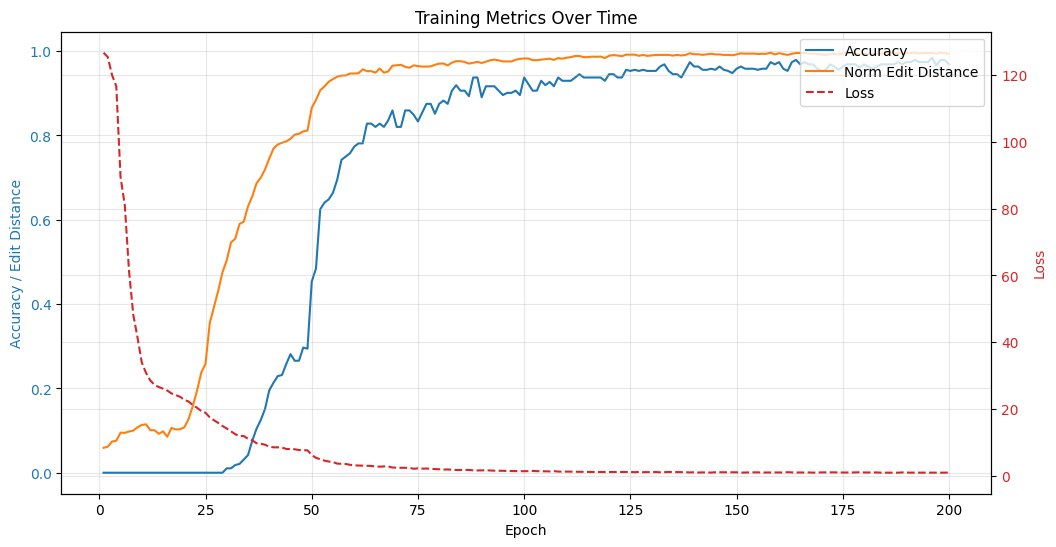

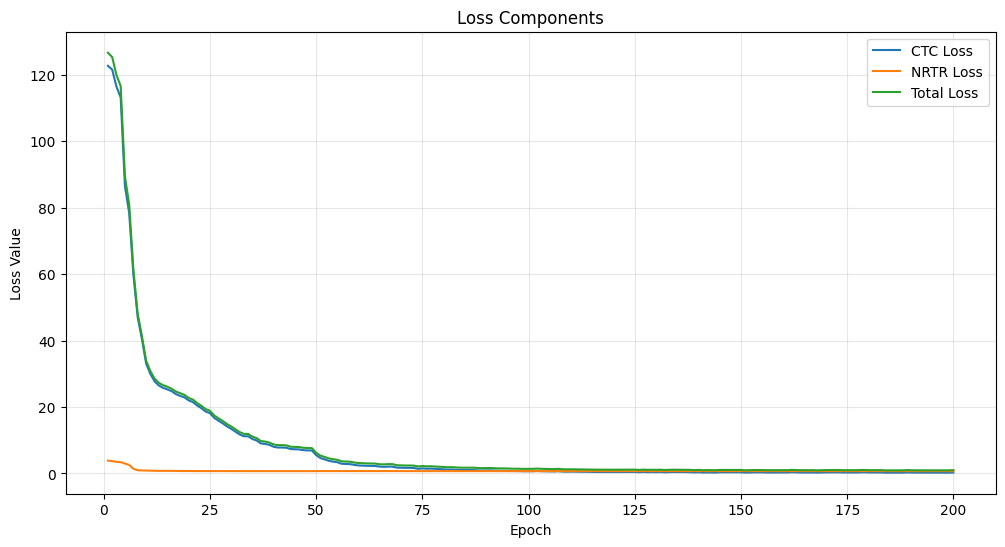


Training Summary:
--------------------------------------------------
Total Epochs: 200
Best Accuracy: 0.9844 (Epoch 196)
Final Accuracy: 0.9688
Best Norm Edit Distance: 0.9963 (Epoch 158)
Lowest Loss: 0.9313 (Epoch 198)

Final Model Metrics:
--------------------------------------------------


Metric     Value
0            Accuracy    0.9688
1  Norm Edit Distance    0.9937
2                Loss    1.0034
3       Learning Rate  2.00e-06

In [ ]:
# Parse log data
def parse_log_line(line):
    """Parse a single line of the training log"""
    # Skip lines that don't contain training metrics
    if not ('epoch:' in line and 'global_step:' in line):
        return None

    data = {}

    # Extract epoch
    epoch_match = re.search(r'epoch: \[(\d+)/(\d+)\]', line)
    if epoch_match:
        data['epoch'] = int(epoch_match.group(1))
        data['total_epochs'] = int(epoch_match.group(2))

    # Extract metrics
    metrics = {
        'lr': r'lr: ([\d.e-]+)',
        'acc': r'acc: ([\d.]+)',
        'norm_edit_dis': r'norm_edit_dis: ([\d.]+)',
        'CTCLoss': r'CTCLoss: ([\d.]+)',
        'NRTRLoss': r'NRTRLoss: ([\d.]+)',
        'loss': r'loss: ([\d.]+)',
    }

    for metric, pattern in metrics.items():
        match = re.search(pattern, line)
        if match:
            data[metric] = float(match.group(1))

    # Only return if we have the essential metrics
    if 'epoch' in data and 'acc' in data and 'loss' in data:
        return data
    return None

# Create DataFrame
data_points = []
for line in log_content.split('\n'):
    try:
        parsed_data = parse_log_line(line)
        if parsed_data:
            data_points.append(parsed_data)
    except Exception as e:
        continue

df = pd.DataFrame(data_points)
df = df.sort_values('epoch').reset_index(drop=True)
df = df.drop_duplicates(subset=['epoch'], keep='last')

# Set plot style
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Plot 1: Accuracy and Loss
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy / Edit Distance', color=color)
ax1.plot(df['epoch'], df['acc'], color=color, label='Accuracy')
ax1.plot(df['epoch'], df['norm_edit_dis'], color='tab:orange', label='Norm Edit Distance')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Loss', color=color)
ax2.plot(df['epoch'], df['loss'], color=color, label='Loss', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Training Metrics Over Time')
plt.show()

# Plot 2: Loss Components
plt.figure()
plt.plot(df['epoch'], df['CTCLoss'], label='CTC Loss')
plt.plot(df['epoch'], df['NRTRLoss'], label='NRTR Loss')
plt.plot(df['epoch'], df['loss'], label='Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss Components')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print training summary
print("\nTraining Summary:")
print("-" * 50)
print(f"Total Epochs: {df['epoch'].max()}")
print(f"Best Accuracy: {df['acc'].max():.4f} (Epoch {df.loc[df['acc'].idxmax(), 'epoch']})")
print(f"Final Accuracy: {df['acc'].iloc[-1]:.4f}")
print(f"Best Norm Edit Distance: {df['norm_edit_dis'].max():.4f} (Epoch {df.loc[df['norm_edit_dis'].idxmax(), 'epoch']})")
print(f"Lowest Loss: {df['loss'].min():.4f} (Epoch {df.loc[df['loss'].idxmin(), 'epoch']})")

# Display key statistics
print("\nFinal Model Metrics:")
print("-" * 50)
final_metrics = df.iloc[-1]
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Norm Edit Distance', 'Loss', 'Learning Rate'],
    'Value': [
        f"{final_metrics['acc']:.4f}",
        f"{final_metrics['norm_edit_dis']:.4f}",
        f"{final_metrics['loss']:.4f}",
        f"{final_metrics['lr']:.2e}"
    ]
})
display(metrics_table)

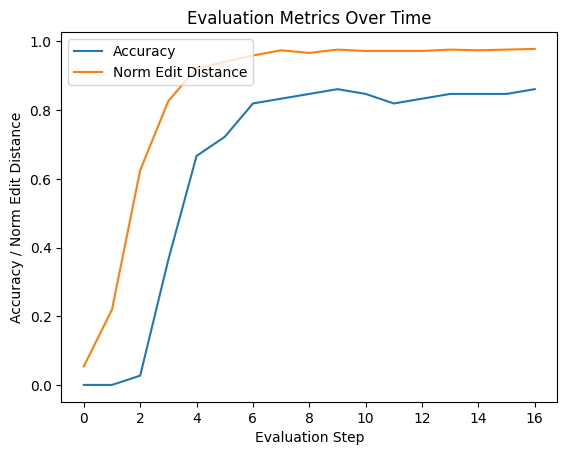


Evaluation Summary:
--------------------------------------------------
Total Evaluation Steps: 17
Best Accuracy: 0.8611 (Step 9)
Final Accuracy: 0.8611
Best Norm Edit Distance: 0.0541 (Step 0)
Final Norm Edit Distance: 0.9783

Final Evaluation Metrics:
--------------------------------------------------


Metric   Value
0            Accuracy  0.8611
1  Norm Edit Distance  0.9783

In [ ]:
def parse_valid_log_line(line):
    """Extract 'acc' and 'norm_edit_dis' from the log line."""
    data = {}

    # Match lines with 'cur metric'
    if 'cur metric' in line:
        acc_match = re.search(r'acc: ([\d.]+)', line)
        norm_edit_dis_match = re.search(r'norm_edit_dis: ([\d.]+)', line)

        if acc_match and norm_edit_dis_match:
            data['acc'] = float(acc_match.group(1))
            data['norm_edit_dis'] = float(norm_edit_dis_match.group(1))

    return data

# Extract evaluation metrics
eval_data_points = []
for line in log_content.split('\n'):
    parsed_data = parse_valid_log_line(line)
    if parsed_data:
        eval_data_points.append(parsed_data)

# If no evaluation data found
if not eval_data_points:
    print("No evaluation data found in log.")
else:
    # Create DataFrame for the evaluation data
    eval_df = pd.DataFrame(eval_data_points)

    # Plot the Evaluation Metrics: Accuracy and Norm Edit Distance
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Evaluation Step')
    ax1.set_ylabel('Accuracy / Norm Edit Distance')
    ax1.plot(eval_df.index, eval_df['acc'], color='tab:blue', label='Accuracy')
    ax1.plot(eval_df.index, eval_df['norm_edit_dis'], color='tab:orange', label='Norm Edit Distance')
    ax1.tick_params(axis='y')

    # Add legend
    ax1.legend(loc='upper left')

    plt.title('Evaluation Metrics Over Time')
    plt.show()

    # Print Evaluation Summary
    print("\nEvaluation Summary:")
    print("-" * 50)
    print(f"Total Evaluation Steps: {len(eval_df)}")
    print(f"Best Accuracy: {eval_df['acc'].max():.4f} (Step {eval_df['acc'].idxmax()})")
    print(f"Final Accuracy: {eval_df['acc'].iloc[-1]:.4f}")
    print(f"Best Norm Edit Distance: {eval_df['norm_edit_dis'].min():.4f} (Step {eval_df['norm_edit_dis'].idxmin()})")
    print(f"Final Norm Edit Distance: {eval_df['norm_edit_dis'].iloc[-1]:.4f}")

    # Display key evaluation statistics
    print("\nFinal Evaluation Metrics:")
    print("-" * 50)
    final_eval_metrics = eval_df.iloc[-1]
    eval_metrics_table = pd.DataFrame({
        'Metric': ['Accuracy', 'Norm Edit Distance'],
        'Value': [
            f"{final_eval_metrics['acc']:.4f}",
            f"{final_eval_metrics['norm_edit_dis']:.4f}"
        ]
    })
    display(eval_metrics_table)

# Evaluate on testset
I was change the config file to paddleocr_training/test_list.txt to evaluate in testset

In [106]:

!python3 PaddleOCR/tools/eval.py -c paddleocr_training/config.yml -o Global.checkpoints=/content/drive/MyDrive/Deeplearning/Final_project/output/rec_ppocr_v4/best_accuracy

/usr/local/lib/python3.10/dist-packages/setuptools/command/easy_install.py:41: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_name

## Export model and inference

In [2]:
!python -m pip install paddlepaddle==2.4.2 -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install paddleocr

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.7/121.7 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.

In [ ]:
!export FLAGS_enable_pir_api=0

In [39]:
!python3 PaddleOCR/tools/export_model.py -c paddleocr_training/config.yml -o Global.pretrained_model=/output/rec_ppocr_v4/best_accuracy  Global.save_inference_dir=/output/inference/license_plate_mode Global.rec_char_dict_path="/content/drive/MyDrive/Deeplearning/Final_project/paddleocr_training/dict.txt"

/usr/local/lib/python3.10/dist-packages/setuptools/command/easy_install.py:41: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_name

In [40]:
from paddleocr import PaddleOCR,draw_ocr
# Path to the image
img_path = '/content/drive/MyDrive/Deeplearning/Final_project/dataset/test/CN498JC.png'
ocr = PaddleOCR(use_angle_cls=True, use_gpu=True, rec_model_dir="/output/inference/license_plate_mode/inference",)
result = ocr.ocr(img_path, cls=False, det=False, rec=True)
for line in result:
    print(line)

[2024/12/12 20:27:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/output/inference/license_plate_mode/inference', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char

In [94]:
result = ocr.ocr(img_path, cls=False, det=True, rec=True)[0]

[2024/12/12 19:16:19] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.09483575820922852
[2024/12/12 19:16:19] ppocr DEBUG: rec_res num  : 2, elapsed : 0.3678090572357178


In [96]:
def calculate_area(box):
    # Calculate the area of the bounding box
    x1, y1 = box[0]
    x2, y2 = box[1]
    x3, y3 = box[2]
    x4, y4 = box[3]
    # Use the shoelace formula to calculate the area of the quadrilateral
    return abs(x1*y2 + x2*y3 + x3*y4 + x4*y1 - (y1*x2 + y2*x3 + y3*x4 + y4*x1)) / 2

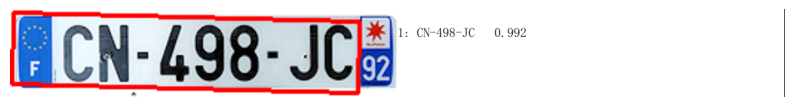

In [97]:
max_area = 0
max_box = None
max_txt = None
max_score = None

for line in result:
    box = line[0]
    area = calculate_area(box)
    if area > max_area:
        max_area = area
        max_box = box
        max_txt = line[1][0]
        max_score = line[1][1]
# Visualize the result with the largest bounding box
image = Image.open(img_path).convert('RGB')  # Open image with PIL
im_show = draw_ocr(image, [max_box], [max_txt], [max_score], font_path='PaddleOCR/doc/fonts/simfang.ttf', drop_score=0.7)

# Show the image with the largest bounding box drawn on it
plt.figure(figsize=(10, 10))
plt.imshow(im_show)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
!python3 PaddleOCR/tools/infer_rec.py -c paddleocr_training/config.yml -o Global.pretrained_model=/content/drive/MyDrive/Deeplearning/Final_project/output/rec_ppocr_v4/best_accuracy  Global.infer_img=/content/drive/MyDrive/Deeplearning/Final_project/dataset/test/5B40001.png


[2024/12/11 23:39:45] ppocr INFO: Architecture : 
[2024/12/11 23:39:45] ppocr INFO:     Backbone : 
[2024/12/11 23:39:45] ppocr INFO:         name : PPLCNetV3
[2024/12/11 23:39:45] ppocr INFO:         scale : 0.95
[2024/12/11 23:39:45] ppocr INFO:     Head : 
[2024/12/11 23:39:45] ppocr INFO:         head_list : 
[2024/12/11 23:39:45] ppocr INFO:             CTCHead : 
[2024/12/11 23:39:45] ppocr INFO:                 Head : 
[2024/12/11 23:39:45] ppocr INFO:                     fc_decay : 1e-05
[2024/12/11 23:39:45] ppocr INFO:                 Neck : 
[2024/12/11 23:39:45] ppocr INFO:                     depth : 2
[2024/12/11 23:39:45] ppocr INFO:                     dims : 120
[2024/12/11 23:39:45] ppocr INFO:                     hidden_dims : 120
[2024/12/11 23:39:45] ppocr INFO:                     kernel_size : [1, 3]
[2024/12/11 23:39:45] ppocr INFO:                     name : svtr
[2024/12/11 23:39:45] ppocr INFO:                     use_guide : True
[2024/12/11 23:39:45] ppocr 

In [17]:
ocr = PaddleOCR(use_angle_cls=True, use_gpu=True, rec_model_dir="/content/drive/MyDrive/Deeplearning/Final_project/output/rec_ppocr_v4/best_accuracy",rec_char_dict_path="/content/drive/MyDrive/Deeplearning/Final_project/paddleocr_training/dict.txt")

[2024/12/12 20:03:27] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/content/drive/MyDrive/Deeplearning/Final_project/output/rec_ppocr_v4/best_accuracy', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batc

Processing image: LBHT71.png


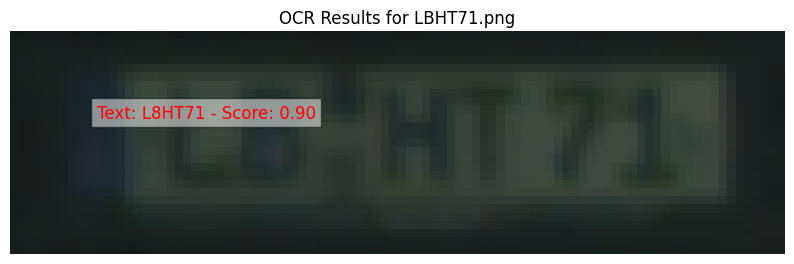

Processing image: KA761ET.png


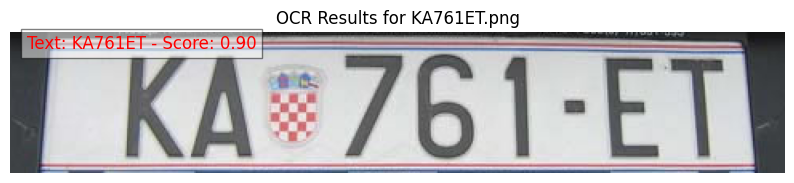

Processing image: WW921MX.jpg


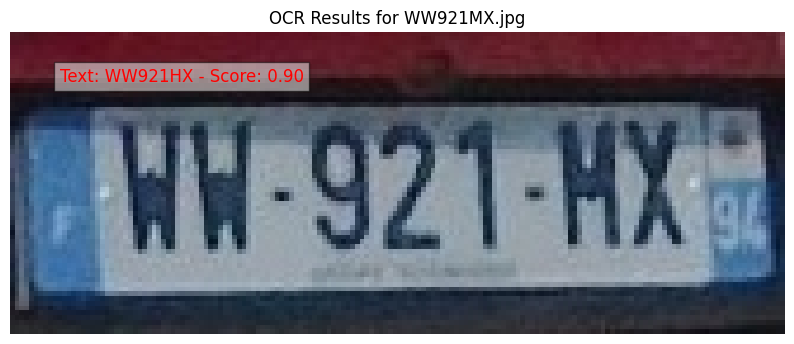

Processing image: BL33635.png


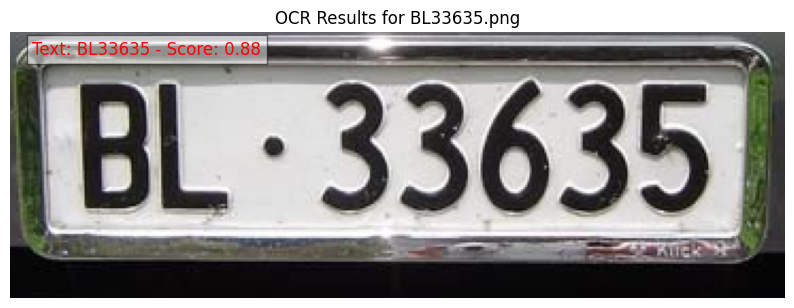

Processing image: 8427XX29.jpg


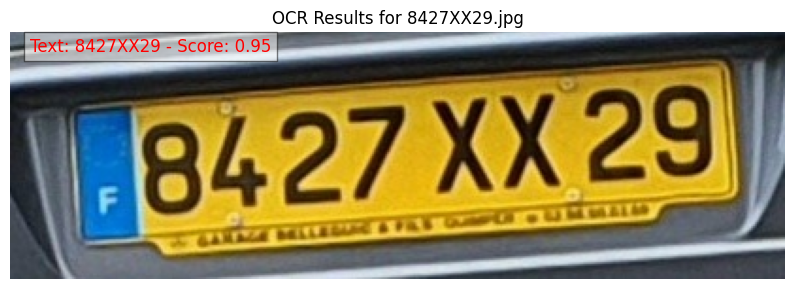

Processing image: AC508V.png


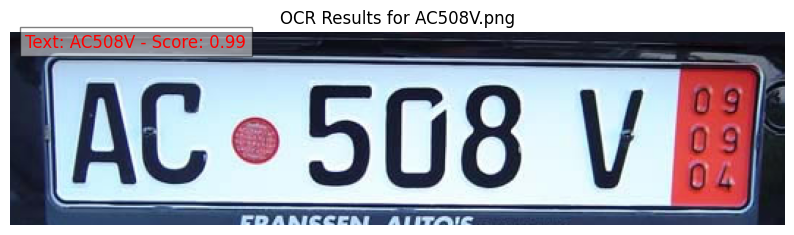

Processing image: Z3010AZ.png


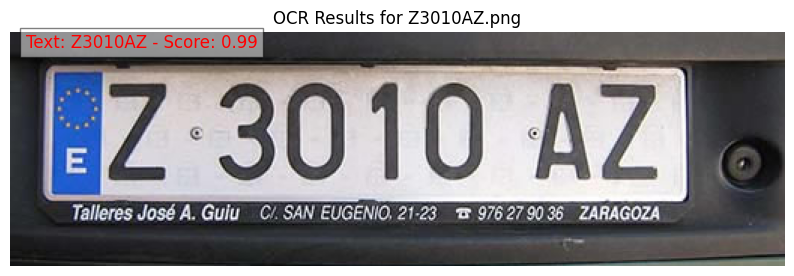

Processing image: AL193VP.jpg


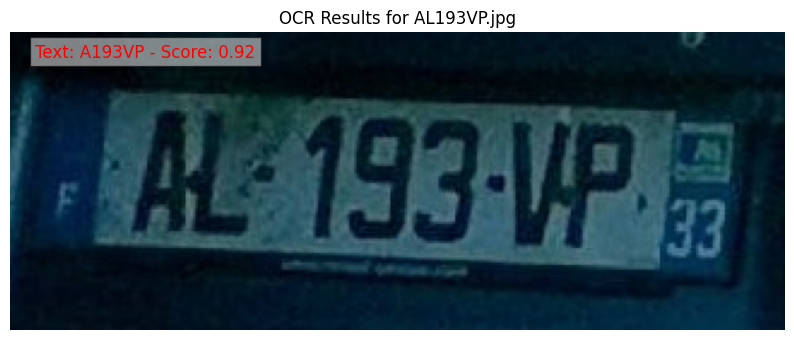

Processing image: KZ746AR.png


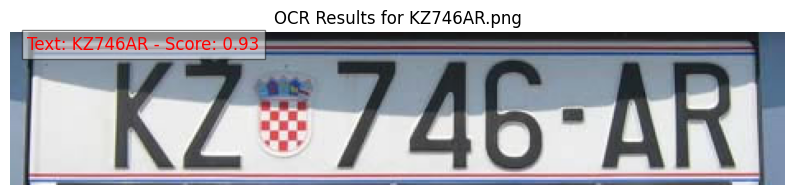

Processing image: DANKE82.png


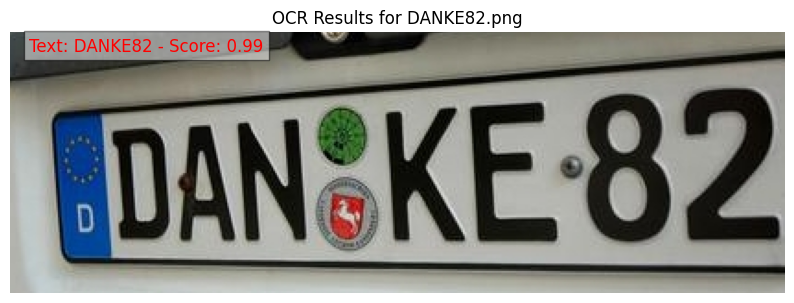

In [35]:
# Path to the directory containing images
image_dir = '/content/drive/MyDrive/Deeplearning/Final_project/dataset/test/'

# Get a list of all image files in the directory (filtering out non-image files)
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Randomly pick 10 images from the list
random_images = random.sample(image_files, 10)

# Process each randomly selected image
for img_name in random_images:
    img_path = os.path.join(image_dir, img_name)

    print(f"Processing image: {img_name}")

    # Run OCR with cls=False, det=False, rec=True
    result = ocr.ocr(img_path, cls=False, det=False, rec=True)[0]

    # Extract text and scores from the result
    txts = [line[0] for line in result]
    scores = [line[1] for line in result]

    # Open image using PIL
    image = Image.open(img_path).convert('RGB')

    # Create the plot
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # If no boxes, just display the texts at default positions (text will be stacked vertically)
    for idx, txt in enumerate(txts):
        # Check if score is numeric before converting to float
        try:
            score = float(scores[idx])
        except ValueError:
            score = 1.0  # Assign a default score if the conversion fails (e.g., if the score is a string like 'U')

        plt.text(10, 10 + idx * 30, f"Text: {txt} - Score: {score:.2f}",
                 color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')  # Hide axes
    plt.title(f"OCR Results for {img_name}")
    plt.show()